In [1]:
#imports
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Josh's paths
will_daily_file = "Resources/daily_salmon_willamette.csv"
will_annual_file = "Resources/willamette_annual_final.csv"
will_annual_g_file = "Resources/willamette_annual_gage_final.csv"

#Courtney's paths
Bonn_above_daily_file = "Resources/yearly_bonneville_salmon_above_df.csv"
Bonn_above_daily_temp_file = "Resources/clean_temp_above_bonn_df.csv"
Bonn_above_daily_gage_file = "Resources/merged_above_bonneville_salmon_data_df.csv"

#Jenny's paths
bonne_above_yearly_gage_file = "Resources/merged_columbia_bonneville_stevenson_salmon_data_df.csv"
bonne_forebay_temp_file = "Resources/merged_clean_above_bonneville_forebay_temp_mean_df.csv"


#Image paths
annual_image_path = "Annual_Images/"
daily_image_path = "Daily_Images/"

In [3]:
#Josh's read dfs
daily_salmon_willamette = pd.read_csv(will_daily_file, sep=",")
willamette_annual_final = pd.read_csv(will_annual_file, sep=",")
willamette_annual_gage_final = pd.read_csv(will_annual_g_file, sep=",")

#Courtney's read dfs
yearly_bonneville_salmon_df = pd.read_csv(Bonn_above_daily_file, sep=",")
clean_temp_above_bonn_df = pd.read_csv(Bonn_above_daily_temp_file, sep=",")
merged_above_bonneville_salmon_data_df = pd.read_csv(Bonn_above_daily_gage_file, sep=",")

#Jenny's Read dfs
bonne_above_yearly_gage_df = pd.read_csv(bonne_above_yearly_gage_file, sep=",")
bonne_forebay_temp_df = pd.read_csv(bonne_forebay_temp_file, sep=",")

In [4]:
willamette_annual_gage_final

,Project,Year,Dates,Chinook,gage_height_ft
0,Willamette Falls,2009,3/15 - 5/31,17057,6.329968
1,Willamette Falls,2010,3/15 - 5/31,43661,4.833822
2,Willamette Falls,2011,3/15 - 5/31,18970,10.236951
3,Willamette Falls,2012,3/15 - 5/31,20761,10.390069
4,Willamette Falls,2013,3/15 - 5/31,17821,6.148852
5,Willamette Falls,2014,3/15 - 5/31,19671,8.795886
6,Willamette Falls,2015,3/15 - 5/31,44169,4.907156
7,Willamette Falls,2016,3/15 - 5/31,16836,7.401407
8,Willamette Falls,2017,3/15 - 5/31,17483,13.404161
9,Willamette Falls,2018,3/15 - 5/31,15256,9.166749


In [5]:
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875


In [6]:
willamette_annual_final.head()

,Project,Year,Dates,Chinook,temp_f
0,Willamette Falls,2009,3/15 - 5/31,17057,50.276609
1,Willamette Falls,2010,3/15 - 5/31,43661,51.323377
2,Willamette Falls,2011,3/15 - 5/31,18970,49.160207
3,Willamette Falls,2012,3/15 - 5/31,20761,49.818062
4,Willamette Falls,2013,3/15 - 5/31,17821,52.860975


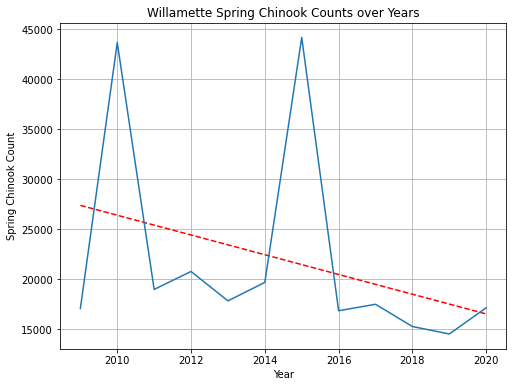

In [7]:
#plot salmon over years

# Calculate a trend line
z = np.polyfit(willamette_annual_final["Year"], willamette_annual_final["Chinook"], 1)
p = np.poly1d(z)

# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Year")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Spring Chinook Counts over Years")
ax.grid(True)
ax.plot(willamette_annual_final["Year"],p(willamette_annual_final["Year"]),"r--")
ax.plot(willamette_annual_final["Year"], willamette_annual_final["Chinook"] )
plt.savefig(annual_image_path + "will_annual_line_time.png")
plt.show()

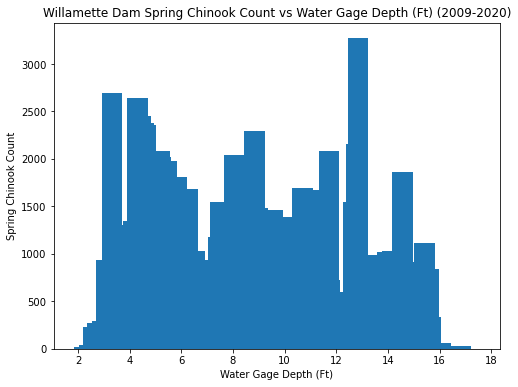

In [8]:
# Plot bar char distribution salmon vs gage
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Water Gage Depth (Ft)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Dam Spring Chinook Count vs Water Gage Depth (Ft) (2009-2020)")
ax.bar(daily_salmon_willamette["gage_height_ft"], daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_bar_gage.png")
plt.show()

The r-value is: -0.028416587457150706
The r2-value is: 0.0008075024427098949
The p-value is: 0.3470624765990099


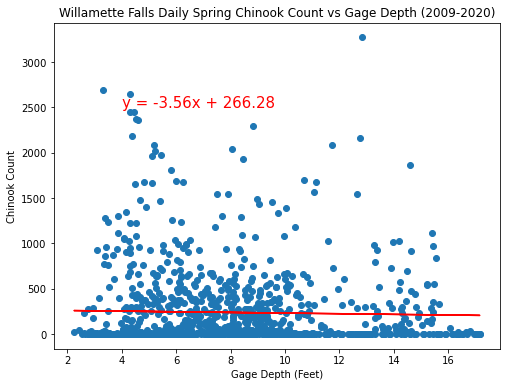

In [9]:
# Plot a scatter and regression of daily river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["gage_height_ft"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (4,2500), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["gage_height_ft"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["gage_height_ft"],daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_scatter_gage.png")
plt.show()

The r-value is: -0.4637390208434601
The r2-value is: 0.2150538794528511
The p-value is: 0.12888150994310013


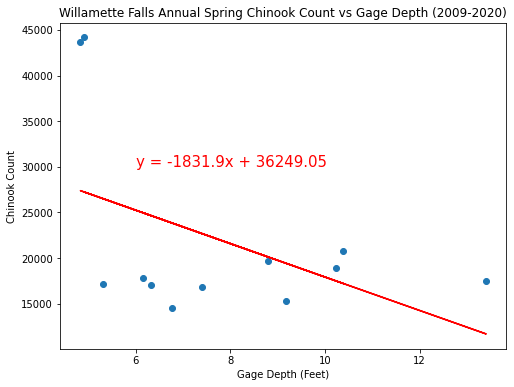

In [10]:
# Plot a scatter and regression of annual river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(willamette_annual_gage_final["gage_height_ft"], 
                                                      willamette_annual_gage_final["Chinook"])
regress_values = willamette_annual_gage_final["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Annual Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (6,30000), fontsize=15, color="red")
ax.plot(willamette_annual_gage_final["gage_height_ft"], regress_values, "r-")
ax.scatter(willamette_annual_gage_final["gage_height_ft"],willamette_annual_gage_final["Chinook"])
plt.savefig(annual_image_path + "will_annual_scatter_gage.png")
plt.show()

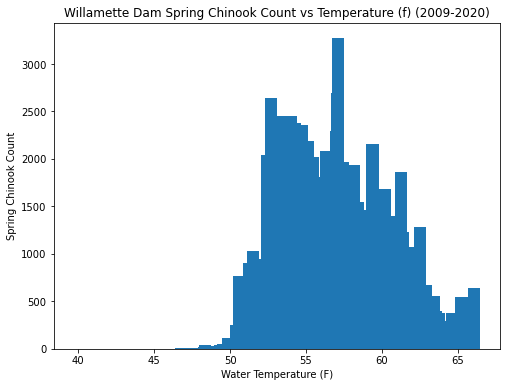

In [11]:
# Plot bar char distribution salmon vs temp
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Water Temperature (F)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Dam Spring Chinook Count vs Temperature (f) (2009-2020)")
ax.bar(daily_salmon_willamette["temp_f"], daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_bar_temp.png")
plt.show()

The r-value is: 0.5179478227126176
The r2-value is: 0.2682699470527412
The p-value is: 2.5054640725765388e-76


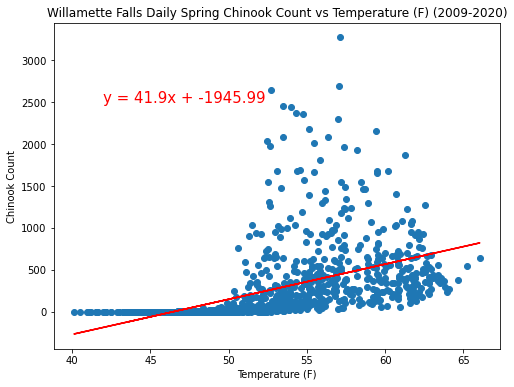

In [12]:
# Plot a scatter and regression of daily river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["temp_f"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Temperature (F) (2009-2020)")
ax.annotate(line_eq, (42,2500), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["temp_f"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["temp_f"],daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_scatter_temp.png")
plt.show()

The r-value is: 0.2880566010177591
The r2-value is: 0.08297660538990445
The p-value is: 0.36390975780670765


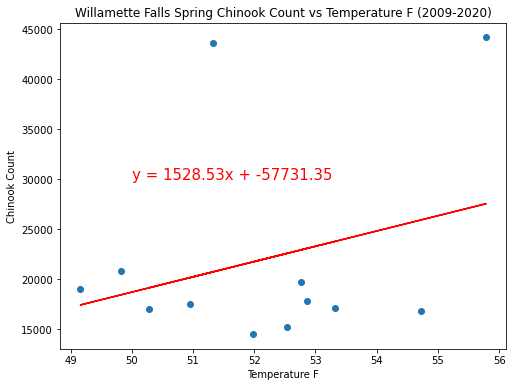

In [13]:
# Plot a scatter and regression of annual river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(willamette_annual_final["temp_f"], 
                                                      willamette_annual_final["Chinook"])
regress_values = willamette_annual_final["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Temperature F")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Count vs Temperature F (2009-2020)")
ax.annotate(line_eq, (50,30000), fontsize=15, color="red")
ax.plot(willamette_annual_final["temp_f"], regress_values, "r-")
ax.scatter(willamette_annual_final["temp_f"],willamette_annual_final["Chinook"])
plt.savefig(annual_image_path + "will_annual_scatter_temp.png")
plt.show()

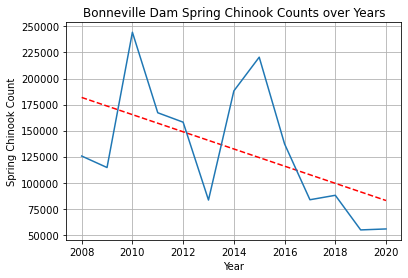

In [14]:
#Courtney's Starts Here
#Bonneville Dam Chinook Salmon Count

# Calculate a trend line
z = np.polyfit(yearly_bonneville_salmon_df["Year"], yearly_bonneville_salmon_df["Chin"], 1)
p = np.poly1d(z)

# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Counts over Years")
ax.grid(True)
ax.plot(yearly_bonneville_salmon_df["Year"],p(yearly_bonneville_salmon_df["Year"]),"r--")
ax.plot(yearly_bonneville_salmon_df["Year"], yearly_bonneville_salmon_df["Chin"] )

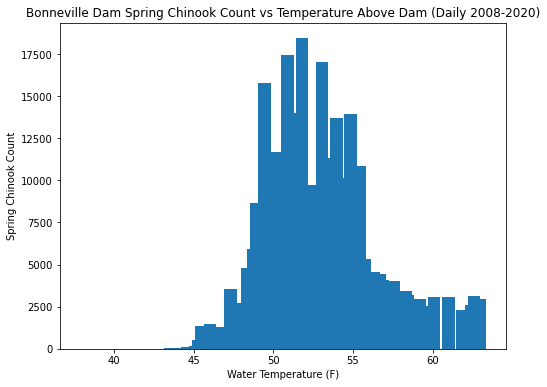

In [15]:
# Plot bar char distribution
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Water Temperature (F)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Count vs Temperature Above Dam (Daily 2008-2020)")
ax.bar(clean_temp_above_bonn_df["temperature_f"], clean_temp_above_bonn_df["Chin"])
plt.savefig(daily_image_path + "bonn_above_daily_bar_temp.png")
plt.show()

The r-value is: 0.3592601486635264
The r2-value is: 0.1290678544177391
The p-value is: 6.352164796550355e-31


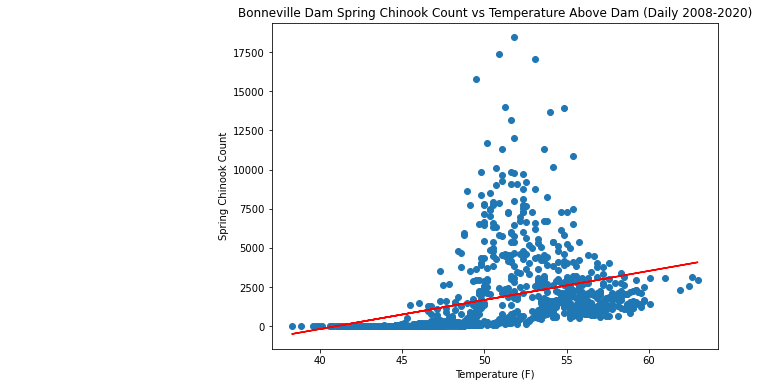

In [16]:
# Plot a scatter and regression of temperature and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(clean_temp_above_bonn_df["temperature_f"], 
                                                      clean_temp_above_bonn_df["Chin"])
regress_values =clean_temp_above_bonn_df["temperature_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Count vs Temperature Above Dam (Daily 2008-2020)")
ax.annotate(line_eq, (21,14500), fontsize=15, color="red")
ax.plot(clean_temp_above_bonn_df["temperature_f"], regress_values, "r-")
ax.scatter(clean_temp_above_bonn_df["temperature_f"], clean_temp_above_bonn_df["Chin"])
plt.savefig(daily_image_path + "bonn_above_daily_scatter_temp.png")
plt.show()

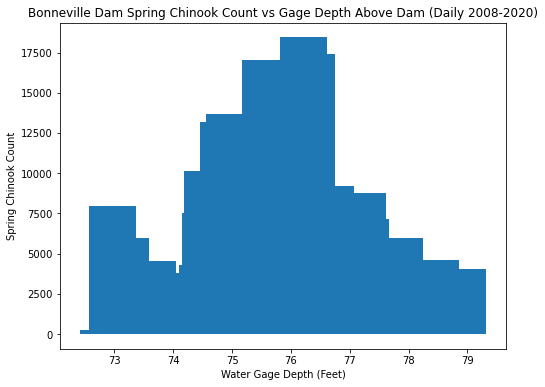

In [17]:
# Plot bar char distribution
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Water Gage Depth (Feet)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Count vs Gage Depth Above Dam (Daily 2008-2020)")
ax.bar(merged_above_bonneville_salmon_data_df["Gage_Mean"], merged_above_bonneville_salmon_data_df["Chin"])
plt.savefig(daily_image_path + "bonn_above_daily_bar_gage.png")
plt.show()

The r-value is: 0.14782599448183223
The r2-value is: 0.02185252464454269
The p-value is: 8.085071504614247e-07


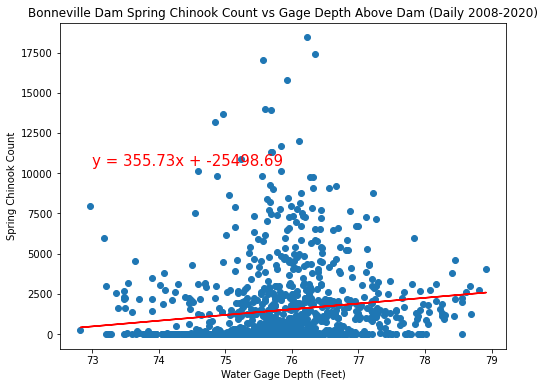

In [18]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(merged_above_bonneville_salmon_data_df["Gage_Mean"], 
                                                      merged_above_bonneville_salmon_data_df["Chin"])
regress_values =merged_above_bonneville_salmon_data_df["Gage_Mean"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Water Gage Depth (Feet)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Count vs Gage Depth Above Dam (Daily 2008-2020)")
ax.annotate(line_eq, (73,10500), fontsize=15, color="red")
ax.plot(merged_above_bonneville_salmon_data_df["Gage_Mean"], regress_values, "r-")
ax.scatter(merged_above_bonneville_salmon_data_df["Gage_Mean"], merged_above_bonneville_salmon_data_df["Chin"])
plt.savefig(daily_image_path + "bonn_above_daily_scatter_gage.png")
plt.show()

In [19]:
bonne_above_yearly_gage_df

,Project,Year,Dates,Chinook,site_no,Gage_Mean
0,Bonneville,2009,3/15 - 5/31,114525,14128600,75.929348
1,Bonneville,2010,3/15 - 5/31,244385,14128600,75.806304
2,Bonneville,2011,3/15 - 5/31,167097,14128600,75.953152
3,Bonneville,2012,3/15 - 5/31,158075,14128600,76.115870
4,Bonneville,2013,3/15 - 5/31,83299,14128600,75.501739
5,Bonneville,2014,3/15 - 5/31,188078,14128600,75.816848
6,Bonneville,2015,3/15 - 5/31,220250,14128600,74.972065
7,Bonneville,2016,3/15 - 5/31,137176,14128600,75.549457
8,Bonneville,2017,3/15 - 5/31,83616,14128600,76.478043
9,Bonneville,2018,3/15 - 5/31,87890,14128600,75.858696


In [20]:
bonne_forebay_temp_df

,Project,Year,Dates,Chinook,site_no,temperature_c,temperature_f
0,Bonneville,2008,3/15 - 5/31,125543,4.538451e+14,8.772361,47.790249
1,Bonneville,2009,3/15 - 5/31,114525,4.538451e+14,9.656450,49.381610
2,Bonneville,2010,3/15 - 5/31,244385,4.538451e+14,10.357500,50.643500
3,Bonneville,2011,3/15 - 5/31,167097,4.538451e+14,9.738436,49.529186
4,Bonneville,2012,3/15 - 5/31,158075,4.538451e+14,9.490812,49.083462
5,Bonneville,2013,3/15 - 5/31,83299,4.538451e+14,10.769777,51.385599
6,Bonneville,2014,3/15 - 5/31,188078,4.538451e+14,10.063594,50.114469
7,Bonneville,2015,3/15 - 5/31,220250,4.538451e+14,11.709347,53.076824
8,Bonneville,2016,3/15 - 5/31,137176,4.538451e+14,11.601190,52.882143
9,Bonneville,2017,3/15 - 5/31,83616,4.538451e+14,8.974010,48.153218


The r-value is: -0.1082099222664741
The r2-value is: 0.011709387276916368
The p-value is: 0.7378161533612653


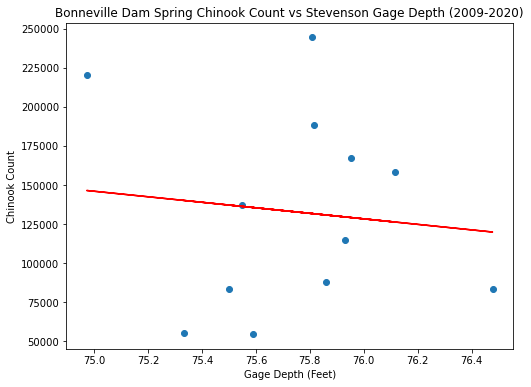

In [21]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation
annual_image_path = "Annual_Images/"
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Gage Depth (Feet)")
plt.ylabel("Chinook Count")
plt.title("Bonneville Dam Spring Chinook Count vs Stevenson Gage Depth (2009-2020)")
plt.scatter(bonne_above_yearly_gage_df["Gage_Mean"],bonne_above_yearly_gage_df["Chinook"])
x_values = bonne_above_yearly_gage_df["Gage_Mean"]
y_values = bonne_above_yearly_gage_df["Chinook"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")


plt.savefig(annual_image_path + "final_above_bonneville_stevenson_annual_chinook_v_bar_gage.png")


plt.show()



The r-value is: 0.2868988228251996
The r2-value is: 0.08231093453848526
The p-value is: 0.34191485855970627


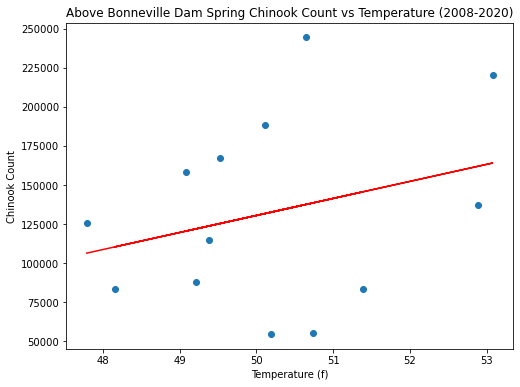

In [22]:
# Plot a scatter and regression of river temp and salmon counts to see if any correlation
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel("Temperature (f)")
plt.ylabel("Chinook Count")
plt.title("Above Bonneville Dam Spring Chinook Count vs Temperature (2008-2020)")
annual_image_path = "Annual_Images/"

plt.scatter(bonne_forebay_temp_df["temperature_f"],
            bonne_forebay_temp_df["Chinook"])
x_values = bonne_forebay_temp_df["temperature_f"]
y_values = bonne_forebay_temp_df["Chinook"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")


plt.savefig(annual_image_path + "final_above_bonneville_stevenson_annual_temp_v_chinook.png")
plt.show()

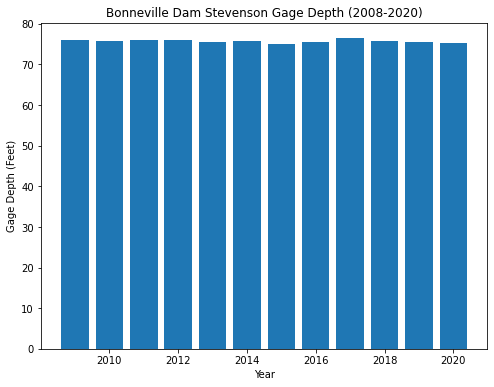

In [25]:
# Generate a bar plot showing the average gage depth using pyplot.
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Gage Depth (Feet)")
plt.title("Bonneville Dam Stevenson Gage Depth (2008-2020)")
annual_image_path = "Annual_Images/"

plt.bar(bonne_above_yearly_gage_df["Year"],bonne_above_yearly_gage_df["Gage_Mean"])
x_values = bonne_above_yearly_gage_df["Gage_Mean"]
y_values = bonne_above_yearly_gage_df["Year"]

plt.savefig(annual_image_path + "final_above_bonneville_stevenson_annual_bar_gage.png")
plt.show()

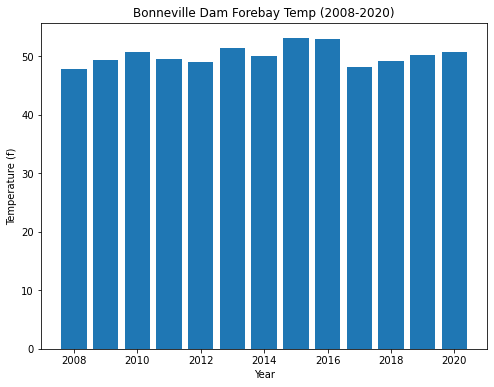

In [24]:
# Generate a bar plot showing the average water temp over years using pyplot.
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Temperature (f)")
plt.title("Bonneville Dam Forebay Temp (2008-2020)")
annual_image_path = "Annual_Images/"

plt.bar(bonne_forebay_temp_df["Year"],bonne_forebay_temp_df["temperature_f"])
x_values = bonne_forebay_temp_df["temperature_f"]
y_values = bonne_forebay_temp_df["Year"]


plt.savefig(annual_image_path + "final_above_bonneville_stevenson_annual_temp.png")
plt.show()